In [13]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
# read the file
df = pd.read_csv('prelim_results.csv')
all_domains = df.columns.to_list()[1:]
print(len(all_domains))
print(all_domains)

# L1 domain names
L1_domains = []
for label in all_domains:
    if '__' in label:
        L1_domains.append(label.split('__')[0])
    elif '.' in label:
        L1_domains.append(label.split('.')[0])
print(L1_domains)

all_Z0 = np.array(df.iloc[0].to_list()[1:]) # zero-shot entries
all_P  = np.array([np.array(row.to_list()[1:]) for itr, row in df.iterrows() if itr>0]) # the results matrix itself

# eliminate the task we haven't trained on yet
sums = np.nansum(all_P,0)
N  = np.where(sums==0)[0][0] # training ends here
P  = all_P[:N, :N].T # result matrix (upper-diagonal)
Z0 = all_Z0[:N] # zero-shot perf.
domains = all_domains[:N] # domain names
L1_domains = L1_domains[:N] # L1 names
print('Training finished until domain ', N)


166
['Culture_and_the_arts__Culture_and_Humanities', 'Culture_and_the_arts__Games_and_Toys', 'Culture_and_the_arts__Mass_media', 'Culture_and_the_arts__Performing_arts', 'Culture_and_the_arts__Sports_and_Recreation', 'Culture_and_the_arts__The_arts_and_Entertainment', 'Culture_and_the_arts__Visual_arts', 'History_and_events__By_continent', 'History_and_events__By_period', 'History_and_events__By_region', 'Technology_and_applied_sciences__Agriculture', 'Technology_and_applied_sciences__Computing', 'Technology_and_applied_sciences__Engineering', 'Technology_and_applied_sciences__Transport', 'Health_and_fitness__Exercise', 'Health_and_fitness__Health_science', 'Health_and_fitness__Human_medicine', 'Health_and_fitness__Nutrition', 'Health_and_fitness__Public_health', 'Health_and_fitness__Self_care', 'Religion_and_belief_systems__Allah', 'Religion_and_belief_systems__Belief_systems', 'Religion_and_belief_systems__Major_beliefs_of_the_world', 'General_referece__Further_research_tools_and_top

Looking into training from Technology_and_applied_sciences__Agriculture to physics.ed-ph
Zero-shot performance [26.03243256 27.20858574 27.90221977 29.84068108 21.65246964 22.85026169
 24.50791359 20.28645325 24.36947823 24.56899834 28.43265915 25.68961525
 24.74637794 26.97912025 24.74564743 25.5868988  26.80123901 35.13503647
 32.87830734 26.35764885 29.79245377 28.15137482 26.99516106 26.5870266
 28.09284019 30.25296211 27.57541466 25.83079529 27.41226578 28.07890701
 36.31295395 29.14682961 30.20347977 33.40235138 30.98575974 30.85135269
 33.33125305 28.58072281 30.23090363 29.78265953 26.34264755]
Performance after fine-tuning on the tested sub-domain [38.66731644 38.33879089 34.62680054 34.74591064 26.06915665 27.27494431
 25.91640472 19.86166573 28.66102409 28.69921303 29.99428749 27.88170624
 27.01041222 30.70626068 31.07837486 28.56192207 30.83366203 32.94868851
 29.78193665 21.05181122 20.94663811 20.6466217  21.57505417 18.41062737
 20.69057274 26.98617744 20.05578423 20.555

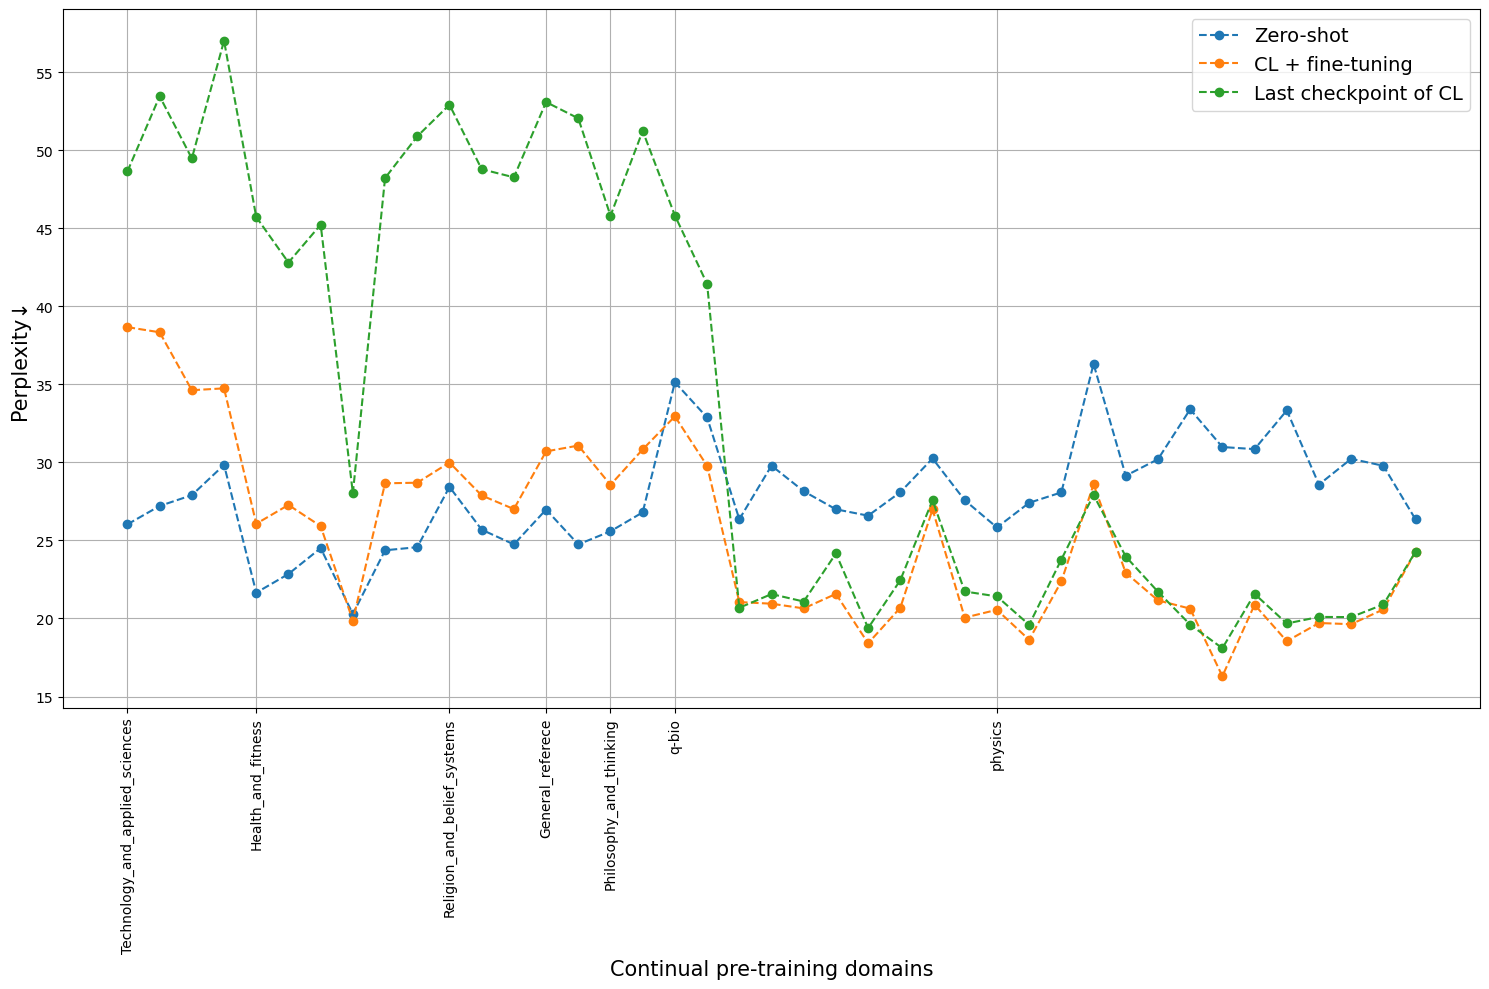

In [30]:
# quantify forgetting within the same domain
i0,i1 = 10,50 # beginning and end

# print the results first
print('Looking into training from', domains[i0], 'to', domains[i1])
Z0_ = Z0[i0:i1+1]
print('Zero-shot performance', Z0_)
FT_ = P.diagonal()[i0:i1+1]
print('Performance after fine-tuning on the tested sub-domain', FT_)
DE_ = P[i0:i1+1,i1]
print('Performance after fine-tuning on the last sub-domain (backward transfer)', DE_)

# plot the results
plt.figure(1,figsize=(15,10))
h1 = plt.plot(Z0_, '--o', label='Zero-shot')
h2 = plt.plot(FT_, '--o', label='CL + fine-tuning')
h3 = plt.plot(DE_, '--o', label='Last checkpoint of CL')
plt.grid()
plt.legend(fontsize=14, loc='upper right')
plt.xlabel('Continual pre-training domains', fontsize=15)
plt.ylabel('Perplexity↓', fontsize=15)
ax = plt.gca()

# long labels
# x_locs = range(0,i1-i0+1)
# x_labels = domains[i0:i1+1]
# short labels
# x_locs = range(0,i1-i0+1)
# x_labels = [label.split('__')[0].split('_')[0] + '_' + label.split('__')[1] if '__' in label else label for label in domains[i0:i1+1]]
# L1 labels
domain_names = L1_domains[i0:i1+1]
cps = [0] + [i+1 for i in range(len(domain_names)-1) if domain_names[i]!=domain_names[i+1]] + [len(domain_names)]
x_locs = [cps[i] for i in range(len(cps)-1)]
x_labels = [domain_names[c] for c in cps[:-1]]
ax.set_xticks(x_locs)
ax.set_xticklabels(x_labels, rotation=90, fontsize=10)
plt.tight_layout();

In [ ]:
# TO-DO compare continual pre-training + fine-tuning performance against fine-tuning of the original model

['Q-BIO', 'Q-BIO', 'Q-BIO', 'Q-BIO', 'Q-BIO', 'Q-BIO', 'Q-BIO', 'Q-BIO', 'PHYSICS', 'PHYSICS', 'PHYSICS', 'PHYSICS', 'PHYSICS', 'PHYSICS', 'PHYSICS', 'PHYSICS', 'PHYSICS', 'PHYSICS', 'PHYSICS', 'PHYSICS', 'PHYSICS', 'PHYSICS', 'PHYSICS', 'PHYSICS', 'PHYSICS', 'PHYSICS', 'PHYSICS', 'PHYSICS', 'PHYSICS', 'PHYSICS', 'COND-MAT', 'COND-MAT', 'COND-MAT', 'COND-MAT', 'COND-MAT', 'COND-MAT', 'COND-MAT', 'COND-MAT', 'COND-MAT', 'NLIN', 'NLIN', 'NLIN', 'NLIN', 'NLIN', 'MATH', 'MATH', 'MATH', 'MATH', 'MATH', 'MATH', 'MATH', 'MATH', 'MATH', 'MATH', 'MATH', 'MATH', 'MATH', 'MATH', 'MATH', 'MATH', 'MATH', 'MATH']


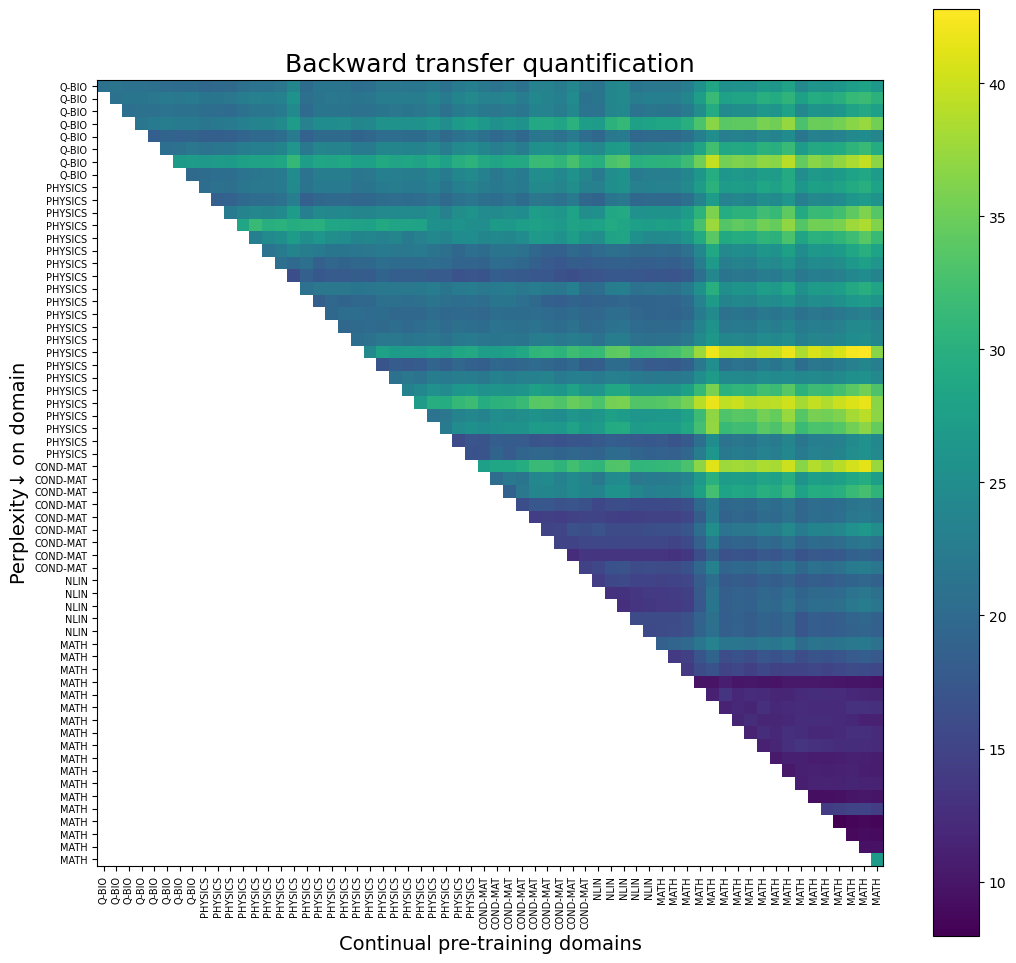

In [35]:
# backward transfer matrix
plt.figure(1,figsize=(11,10))
C1 = 29 # start from this domain
C2 = N  # until that one

plt.imshow(P[C1:C2,C1:C2], cmap='viridis')
plt.title('Backward transfer quantification', fontsize=18)
plt.xlabel('Continual pre-training domains', fontsize=14)
plt.ylabel('Perplexity↓ on domain', fontsize=14)
plt.colorbar()
ax = plt.gca()
labels = [s.upper() for s  in L1_domains[C1:C2]]
print(labels)
ax.set_xticks(range(0,C2-C1))
ax.set_xticklabels(labels, rotation=90, fontsize=7)
ax.set_yticks(range(0,C2-C1))
ax.set_yticklabels(labels, rotation=0, fontsize=7)
plt.tight_layout()

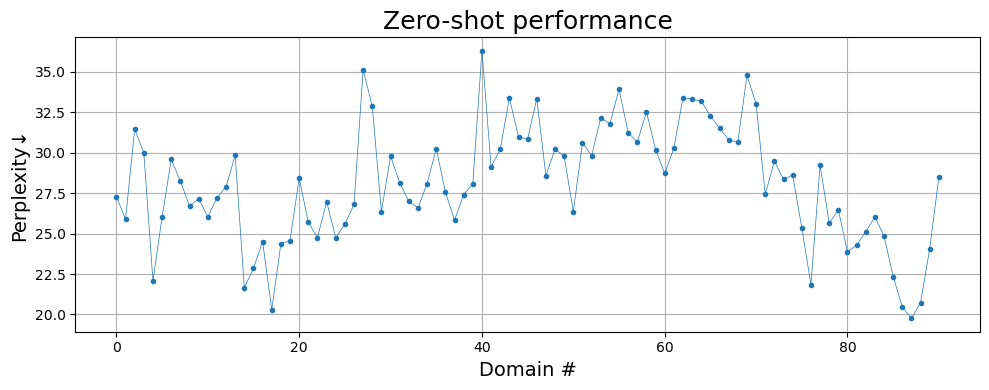

In [7]:
# zero shot performance
fig, ax = plt.subplots(1,1,figsize=(10,4))
ax.plot(Z0, 'o-', ms=3, lw=.5)
ax.grid()
ax.set_xlabel('Domain #', fontsize=14)
ax.set_ylabel('Perplexity↓', fontsize=14)
ax.set_title('Zero-shot performance', fontsize=18)
plt.tight_layout();

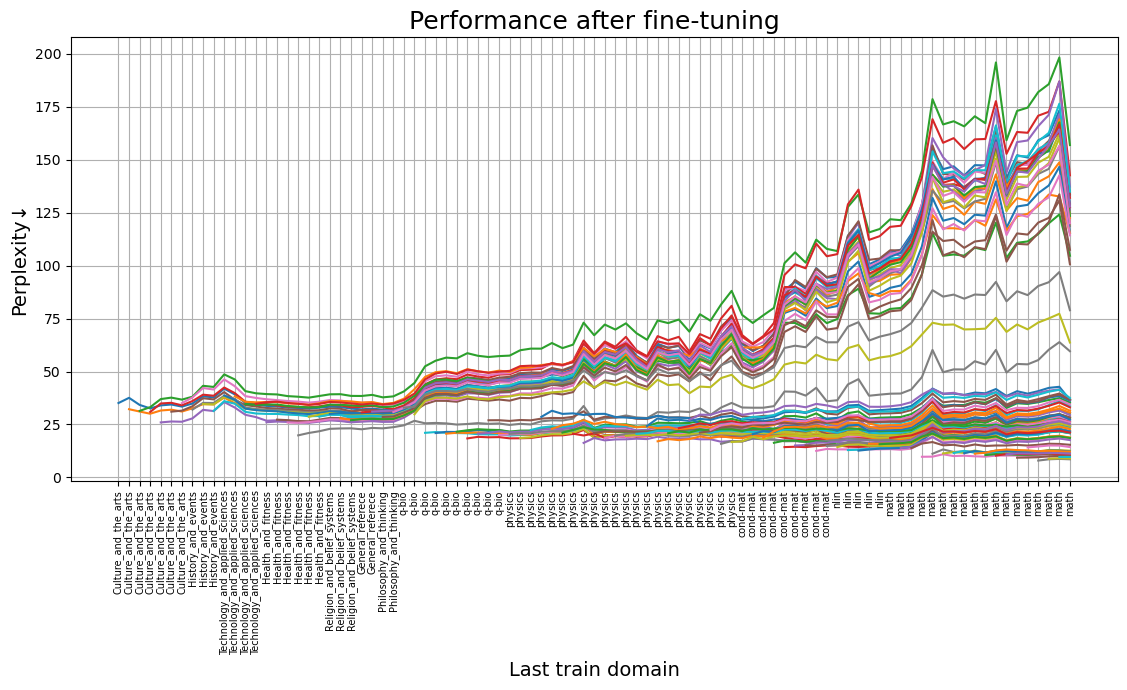

In [38]:
# backward transfer curves
fig, ax = plt.subplots(1,1,figsize=(len(domains)/8,7))
for i in range(N):
    ax.plot(P[i])
ax.grid()
ax.set_xticks(range(0,N))
# ax.set_xticklabels(domains, rotation=90, fontsize=7)
ax.set_xticklabels(L1_domains, rotation=90, fontsize=7)
ax.set_xlabel('Last train domain', fontsize=14)
ax.set_ylabel('Perplexity↓', fontsize=14)
ax.set_title('Performance after fine-tuning', fontsize=18)
plt.tight_layout();



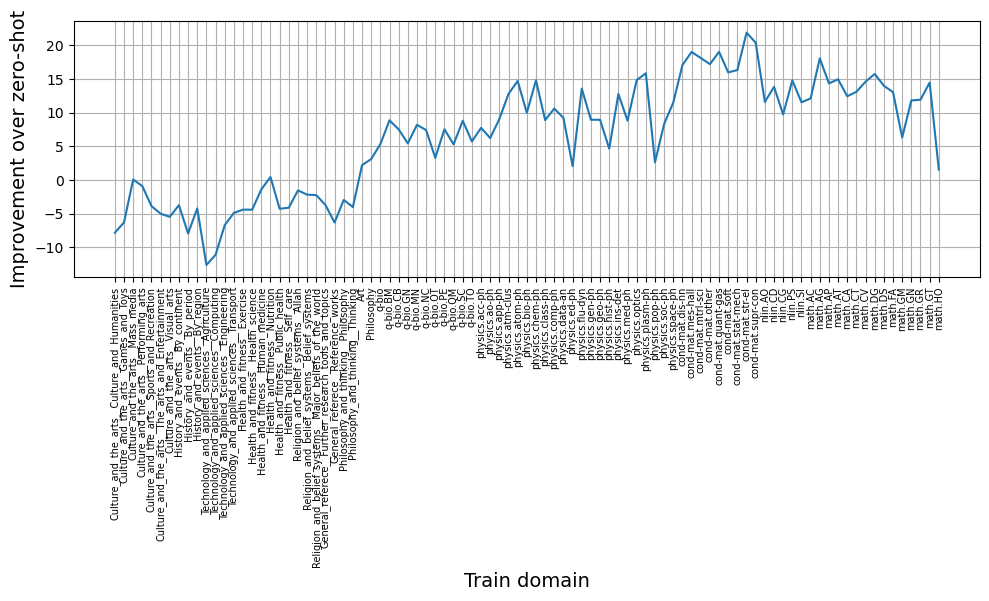

In [214]:
# backward transfer relative to zero-shot
I = P.diagonal() - Z0
fig, ax = plt.subplots(1,1,figsize=(len(domains)/8,6))
ax.plot(-I)
ax.grid()
ax.set_xlabel('Train domain', fontsize=14)
ax.set_xticks(range(0,len(I)))
ax.set_xticklabels(domains], rotation=90, fontsize=7)
ax.set_ylabel('Improvement over zero-shot', fontsize=14)
# ax.set_title('', fontsize=18)
plt.tight_layout();